# Data Input

The dataset was gathered from https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import numpy as np

file_path = '/content/drive/My Drive/Colab Notebooks/ML projects/sms spam classifier/spam.csv'
df = pd.read_csv(file_path, encoding='latin-1')

In [4]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5050,ham,With my sis lor... We juz watched italian job.,NaN,NaN,NaN
3694,ham,"Hello, As per request from &lt;#&gt; Rs.5 ha...",NaN,NaN,NaN
4113,ham,Where are you ? What do you do ? How can you s...,NaN,NaN,NaN
1555,ham,Ok i found dis pierre cardin one which looks n...,NaN,NaN,NaN
1508,ham,Sounds like something that someone testing me ...,NaN,NaN,NaN


In [5]:
df.shape

(5572, 5)

# 1. Data Cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace = True)

In [8]:
df.sample(5)

,v1,v2
1301,ham,I tot u reach liao. He said t-shirt.
3119,ham,Good evening! this is roger. How are you?
4204,spam,IMPORTANT INFORMATION 4 ORANGE USER 0796XXXXXX...
4016,ham,Eek that's a lot of time especially since Amer...
1555,ham,Ok i found dis pierre cardin one which looks n...


In [9]:
#renaming the columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2742,ham,No * am working on the ringing u thing but hav...
448,ham,LOL ... Have you made plans for new years?
1953,ham,Then just eat a shit and wait for ur monkey fa...
3754,ham,"\Im on gloucesterroad what are uup to later?\"""""
2756,ham,Have a good trip. Watch out for . Remember whe...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()


# encoding the target feature
df['target'] = encoder.fit_transform(df['target'])

In [20]:
# Display the mapping of categories
category_mapping = dict(zip(encoder.classes_, encoder.transform(encoder.classes_)))
print("Category Encoding Mapping:")
for category, encoded_value in category_mapping.items():
    print(f"{category}: {encoded_value}")

Category Encoding Mapping:
ham: 0
spam: 1


In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# checking the missing values
df.isnull().sum()

,0
target,0
text,0


As there are no null values so nothing needed to be done here.

In [14]:
# checking for duplicate values
df.duplicated().sum()

403

In [15]:
# dropping the duplicate values (keeping at least one)
df = df.drop_duplicates(keep='first')

In [16]:
df.shape

(5169, 2)

# 2. EDA (Exploratory Data Analysis)

In [17]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [18]:
df['target'].value_counts()

,count
target,
0,4516
1,653


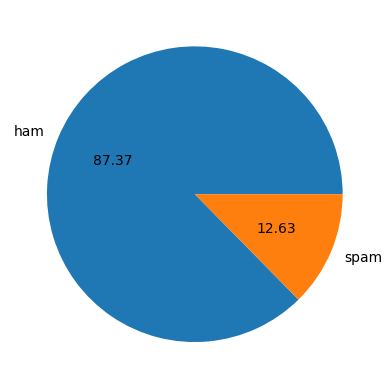

In [21]:
# Showing a basic pie chart for ham and spam ratio
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

Here we can see that the data is largely imbalanced

In [28]:
import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [25]:
# counting the number of characters and showing it in a new column
df['num_characters'] = df['text'].apply(len)

In [26]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
# counting the number of words and showing it in a new column
df['num_words'] = df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [30]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
# counting the number of sentences and showing it in a new column
df['num_sentences'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [32]:
df.head()

,target,text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [33]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [34]:
# ham
df[df['target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# spam
df[df['target'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [36]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

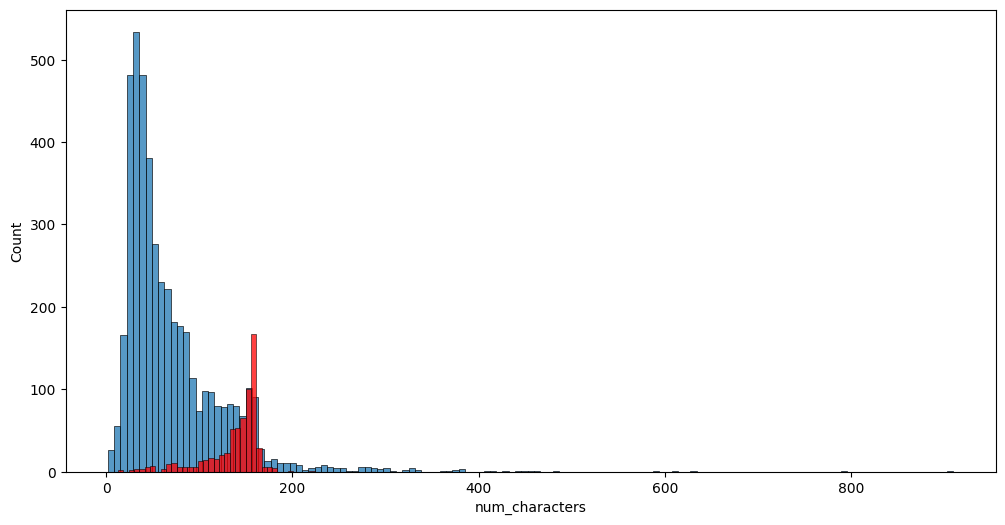

In [37]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_characters'])
sns.histplot(df[df['target'] == 1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

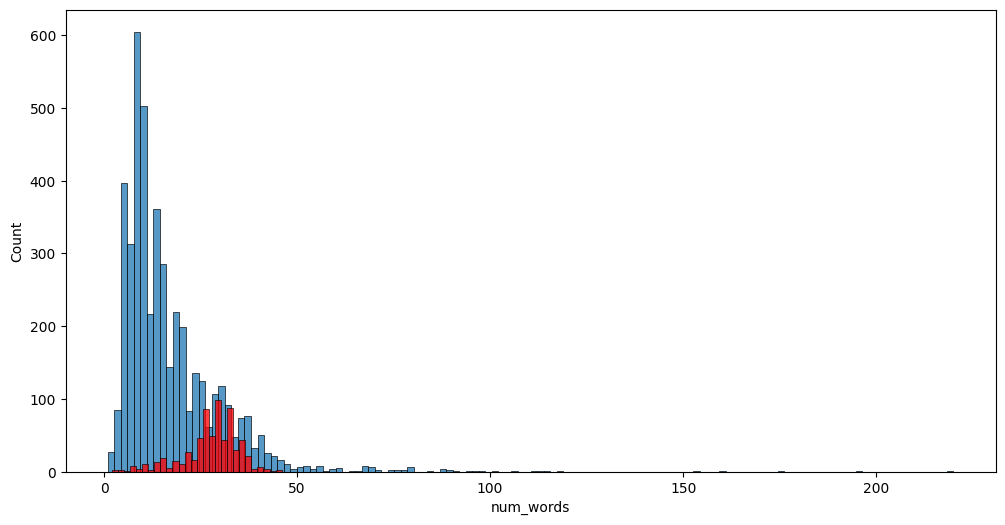

In [38]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_words'])
sns.histplot(df[df['target'] == 1]['num_words'],color='red')

<Axes: xlabel='num_sentences', ylabel='Count'>

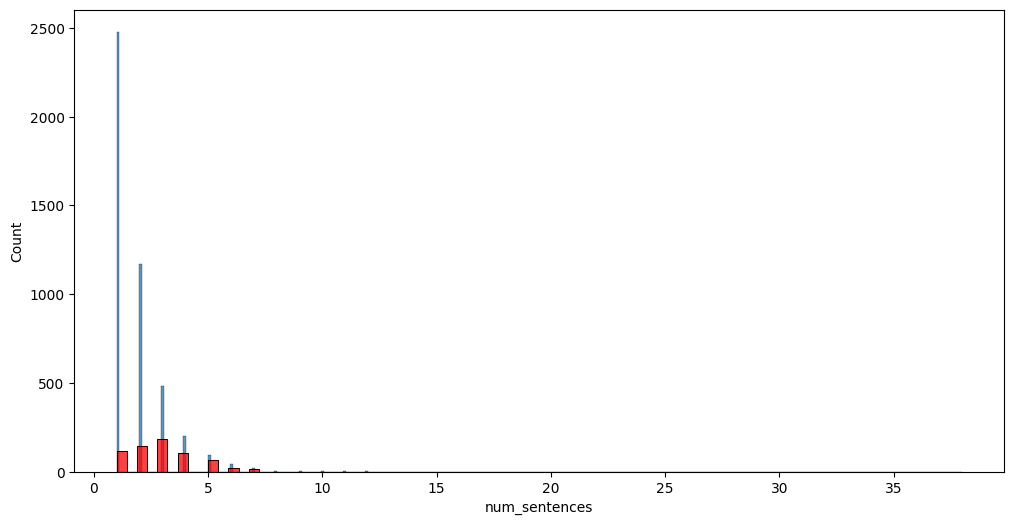

In [39]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target'] == 0]['num_sentences'])
sns.histplot(df[df['target'] == 1]['num_sentences'],color='red')

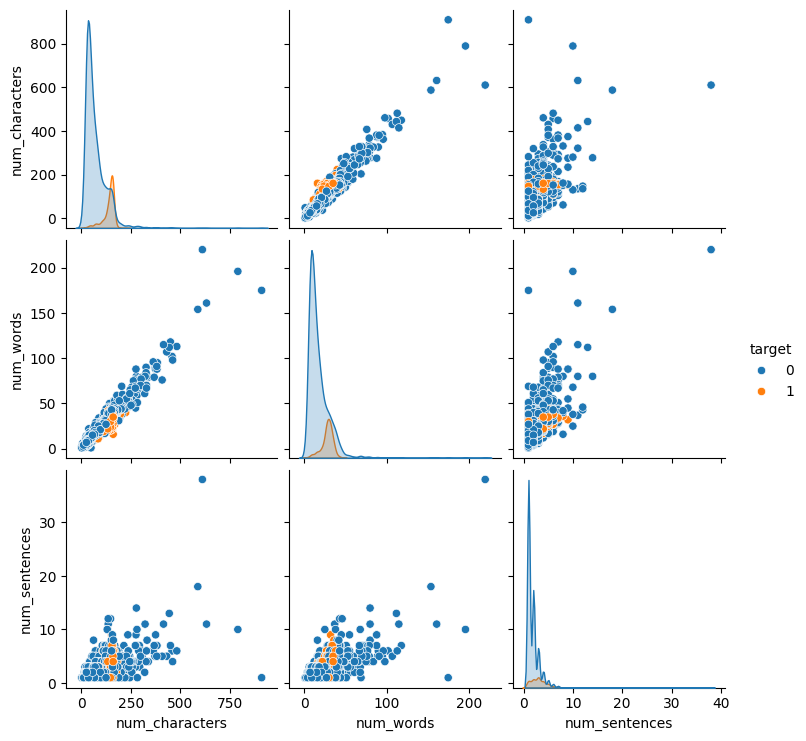

In [40]:
sns.pairplot(df,hue='target')

# 3. Data Preprcessing

For preprocessing I did some basic stuff which are:


*   Lower casing the characters
*   Tokenization
*   Removing Special characters
*   Removing Stopwords and punctuation
*   Stemming





In [41]:
# here we downloaded the stopwords dictionary from nltk
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')
import string
string.punctuation

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [43]:
# also imported a stemmer
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [44]:
# this function does lowercasing, tokenization, removing stopwords and stemming all at the same time
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
    if i.isalnum():
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)

In [45]:
df['transformed_text'] = df['text'].apply(transform_text)

In [46]:
df.head()

,target,text,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


**Here We will use wordcloud to visualize the most found words in the sms in both spam and ham cases**

In [47]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

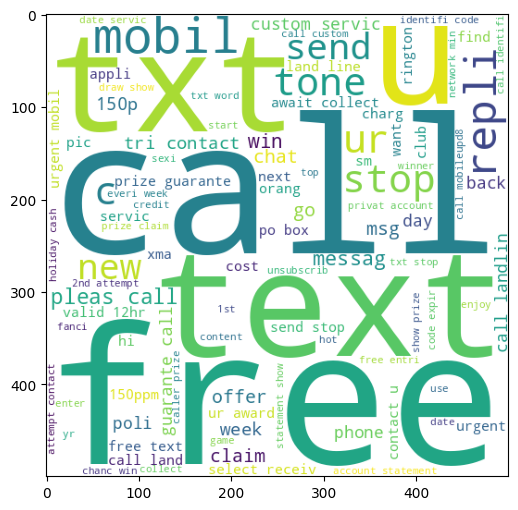

In [50]:
# for spam
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

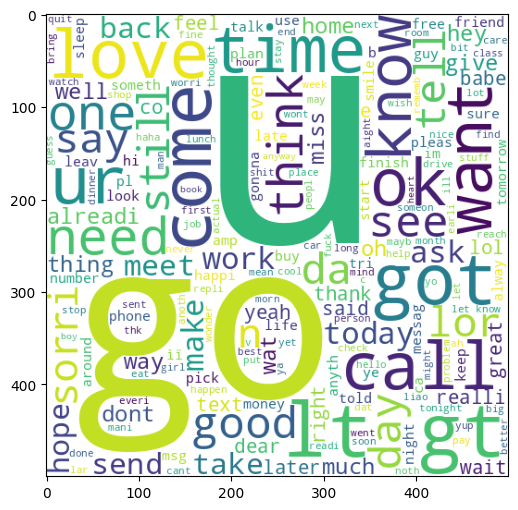

In [52]:
# for ham
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [53]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [54]:
len(spam_corpus)

9939

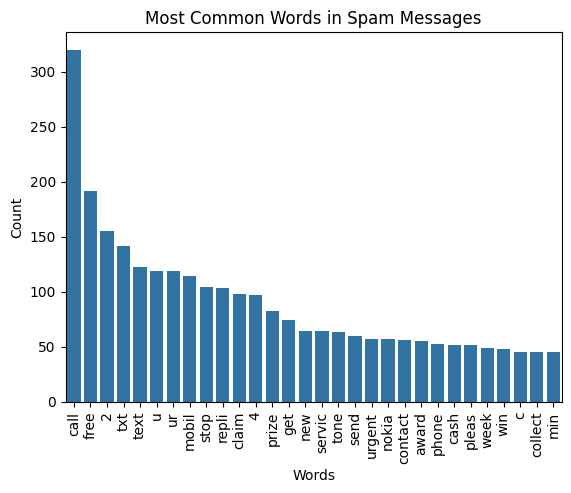

In [56]:
from collections import Counter
# this visualizes the actual count of the words mostly seen
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title("Most Common Words in Spam Messages")
plt.show()

In [57]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [58]:
len(ham_corpus)

35404

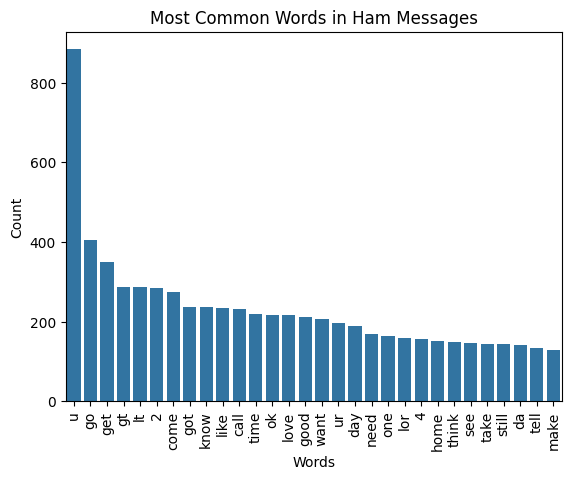

In [59]:
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.xlabel('Words')
plt.ylabel('Count')
plt.title("Most Common Words in Ham Messages")
plt.show()

# 4. Model Building

**Here Tfidf is used for base info retrieval**

In [98]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [67]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [68]:
X.shape

(5169, 3000)

In [69]:
y = df['target'].values

In [70]:
y

array([0, 0, 1, ..., 0, 0, 0])

## Data Splitting (test/train)

In [71]:
from sklearn.model_selection import train_test_split

In [73]:
# Split the data with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

## Model Defination

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier
from xgboost import XGBClassifier
from sklearn.metrics import roc_curve, auc, precision_recall_curve, precision_recall_fscore_support, classification_report

In [64]:
# Define classifiers
bernoulli_nb = BernoulliNB()                               # Bernoulli Naive Bayes
gaussian_nb = GaussianNB()                                # Gaussian Naive Bayes
multinomial_nb = MultinomialNB()                          # Multinomial Naive Bayes
svm = SVC(kernel='sigmoid', gamma=1.0, class_weight='balanced')  # Support Vector Machine (SVM)
logistic_reg = LogisticRegression(solver='liblinear', class_weight='balanced')  # Logistic Regression
knn = KNeighborsClassifier()                              # K-Nearest Neighbors
id3 = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')  # ID3
c45 = DecisionTreeClassifier(criterion='entropy', class_weight='balanced')  # C4.5
cart = DecisionTreeClassifier(criterion='gini', class_weight='balanced')    # CART
rf = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')  # Random Forest
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)              # AdaBoost
bagging = BaggingClassifier(n_estimators=50, random_state=42)                # Bagging
extra_trees = ExtraTreesClassifier(n_estimators=50, random_state=42, class_weight='balanced')  # Extra Trees
gb = GradientBoostingClassifier(n_estimators=50, random_state=42)            # Gradient Boosting
xgb = XGBClassifier(n_estimators=50, random_state=42, scale_pos_weight=10)  # XGBoost

In [65]:
# Dictionary of classifiers
clfs = {
    'BernoulliNB': bernoulli_nb,
    'GaussianNB': gaussian_nb,
    'MultinomialNB': multinomial_nb,
    'SVM': svm,
    'Logistic Regression': logistic_reg,
    'KNN': knn,
    'ID3': id3,
    'C4.5': c45,
    'CART': cart,
    'RandomForest': rf,
    'AdaBoost': adaboost,
    'Bagging': bagging,
    'ExtraTrees': extra_trees,
    'GradientBoosting': gb,
    'XGBoost': xgb
}

### Model run function

**This is a basic function to run the model and return the accuracy and precision**

In [76]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)

    return accuracy,precision

## Running the models

**This is a loop to run all the models and store the accuracy and precision for all of them**

In [77]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():

    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)

    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)

    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  BernoulliNB
Accuracy -  0.9825918762088974
Precision -  0.991304347826087
For  GaussianNB
Accuracy -  0.8568665377176016
Precision -  0.46255506607929514
For  MultinomialNB
Accuracy -  0.9738878143133463
Precision -  0.9814814814814815
For  SVM
Accuracy -  0.9709864603481625
Precision -  0.8686131386861314
For  Logistic Regression
Accuracy -  0.9729206963249516
Precision -  0.8872180451127819
For  KNN
Accuracy -  0.9061895551257253
Precision -  1.0
For  ID3
Accuracy -  0.9400386847195358
Precision -  0.7633587786259542
For  C4.5
Accuracy -  0.9410058027079303
Precision -  0.7464788732394366
For  CART
Accuracy -  0.9361702127659575
Precision -  0.7124183006535948
For  RandomForest
Accuracy -  0.971953578336557
Precision -  0.9811320754716981


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.9632495164410058
Precision -  0.9043478260869565
For  Bagging
Accuracy -  0.9497098646034816
Precision -  0.8110236220472441
For  ExtraTrees
Accuracy -  0.9777562862669246
Precision -  0.9655172413793104
For  GradientBoosting
Accuracy -  0.9574468085106383
Precision -  0.9578947368421052
For  XGBoost
Accuracy -  0.9526112185686654
Precision -  0.7887323943661971


In [78]:
# Creating a new data frame for all the performences to compare
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [79]:
performance_df

,Algorithm,Accuracy,Precision
5,KNN,0.906190,1.000000
0,BernoulliNB,0.982592,0.991304
2,MultinomialNB,0.973888,0.981481
9,RandomForest,0.971954,0.981132
12,ExtraTrees,0.977756,0.965517
13,GradientBoosting,0.957447,0.957895
10,AdaBoost,0.963250,0.904348
4,Logistic Regression,0.972921,0.887218
3,SVM,0.970986,0.868613
11,Bagging,0.949710,0.811024


In [83]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [84]:
performance_df1

,Algorithm,variable,value
0,KNN,Accuracy,0.906190
1,BernoulliNB,Accuracy,0.982592
2,MultinomialNB,Accuracy,0.973888
3,RandomForest,Accuracy,0.971954
4,ExtraTrees,Accuracy,0.977756
5,GradientBoosting,Accuracy,0.957447
6,AdaBoost,Accuracy,0.963250
7,Logistic Regression,Accuracy,0.972921
8,SVM,Accuracy,0.970986
9,Bagging,Accuracy,0.949710


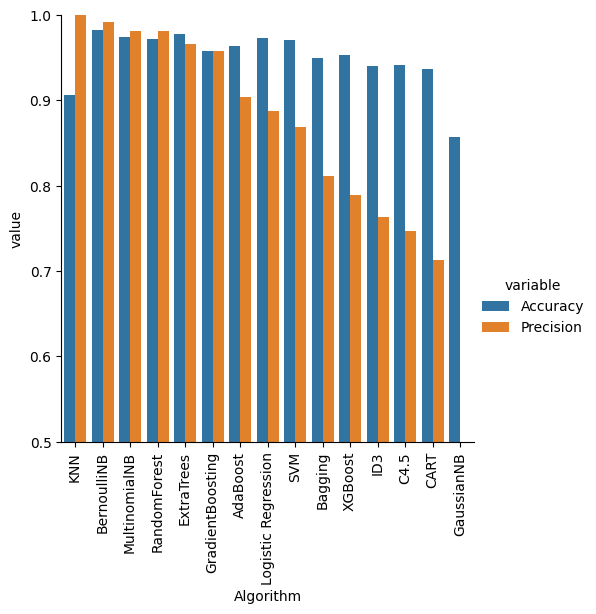

In [85]:
sns.catplot(x = 'Algorithm', y='value', hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# Finalizing the model

So we see that bernouli nb had the best score for overall accuracy and precision. so for our dataset for now lets use BNB as the final model


In [89]:
# Bernoulli NB
bernoulli_nb.fit(X_train,y_train)
y_pred3 = bernoulli_nb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[902   1]
 [ 17 114]]
0.991304347826087


### Example messages

In [91]:
msg1 = "Congratulations! You’ve won a $500 Amazon gift card. Claim it here"
msg2 = "Hey, got your message earlier. Sorry i was late"
msg3 = "Thank you for paying last month’s bill. We’re rewarding our very best customers with a gift for their loyalty. Click here! "

In [93]:
# first preprocess the text
msg1 = transform_text(msg1)
msg2 = transform_text(msg2)
msg3 = transform_text(msg3)

test message 1

In [95]:
# use vectorizer
msg1_vectorized = tfidf.transform([msg1]).toarray()

# Predict using the trained model
prediction = bernoulli_nb.predict(msg1_vectorized)

# Print the prediction
if prediction[0] == 0:
    print("Not Spam")
else:
    print("Spam")

Spam


test message 2

In [96]:
# use vectorizer
msg2_vectorized = tfidf.transform([msg2]).toarray()

# Predict using the trained model
prediction = bernoulli_nb.predict(msg2_vectorized)

# Print the prediction
if prediction[0] == 0:
    print("Not Spam")
else:
    print("Spam")

Not Spam


test message 3

In [97]:
# use vectorizer
msg3_vectorized = tfidf.transform([msg3]).toarray()

# Predict using the trained model
prediction = bernoulli_nb.predict(msg3_vectorized)

# Print the prediction
if prediction[0] == 0:
    print("Not Spam")
else:
    print("Spam")

Spam
